# Scale-invariance in real datasets

In [7]:
import sys

sys.path.append(sys.path[0] + "/..")  # Adds higher directory to python modules path.
import pickle
import numpy as np
from Functions import renormalize, scomplex, plotting
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
plt.rcParams["text.usetex"] = False


colors = ["#003F5C","#2F4B7C","#665191","#A05195","#D45087","#F95D6A","#FF7C43","#FFA600"]
colors_sequential = colors + colors + colors + colors 
colors = ["#02405c", "#fea600", "#a20655", "#5e96c5", "#4b3596", "#fa6ca9", "#8d6cf6"]
colors_curves = colors+ colors+ colors+ colors


# Display scale-invariance parameters (fig. 4a)

## Clique-complex

Load the entropic susceptibilities of the real networks together with their null models, compute their scale-invariance parameters and plot them

/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:71: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Users/marconurisso/Desktop/Lavoro/Simplicial_Renormalization/HodgeLaplacianRenorm/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:71: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


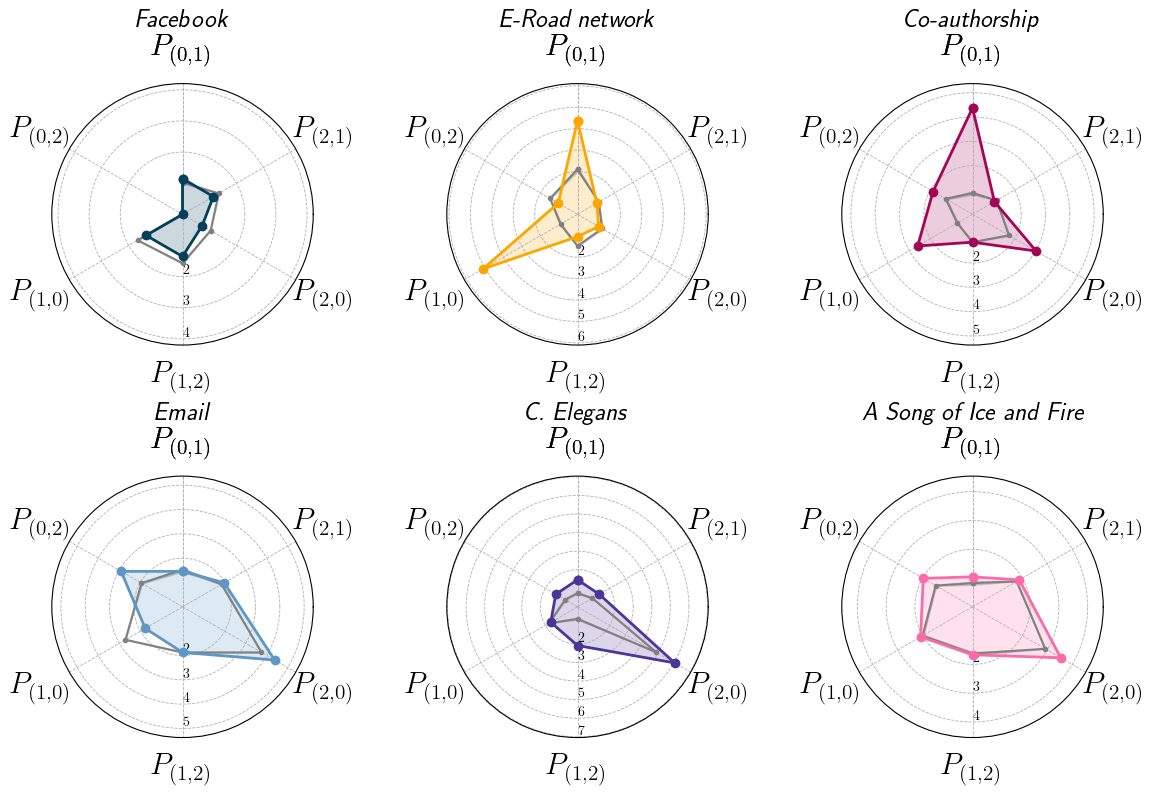

In [15]:
laplacians_types = ["01","02","10","12","20","21"]
nrep = 10 # Number of repetitions of the null model
taumin = -4 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

ymin = -4

tau_space = np.logspace(taumin,taumax,ntau)

names = ["ego-facebook","subelj_euroroad_euroroad", "dimacs10-netscience", "arenas-email","dimacs10-celegans_metabolic","asoiaf"]
true_names = [r"\emph{Facebook}",r"\emph{E-Road network}",r"\emph{Co-authorship}",r"\emph{Email}",r"\emph{C. Elegans}", r"\emph{A Song of Ice and Fire}"]
fig = plt.figure(figsize = (4*3,4*2))
idx = 0

for nn,name in enumerate(names):
    # Load null model
    with open(f'../C_curves/RealData/null_model/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves_cm = pickle.load(handle)
    # Load entropic susceptibilities
    with open(f'../C_curves/RealData/standard/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves = pickle.load(handle)  
    
    measure = np.zeros(len(laplacians_types))
    measure_cm = np.zeros((len(laplacians_types),nrep))

    for i in range(len(laplacians_types)):
        measure[i] = renormalize.measure_SI(tau_space,C_curves[i],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)
        for n in range(nrep):
            measure_cm[i,n] = renormalize.measure_SI(tau_space,C_curves_cm[i][n],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)

    ax = plt.subplot(2,3,idx+1, polar=True)
    stats = measure
    stats_cm = np.mean(measure_cm,1)
    stats_cm_std = np.sqrt((nrep - 1)/nrep)*np.std(measure_cm,1)

    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(laplacians_types), endpoint=False),2*np.pi)
    stats = np.concatenate((stats,[stats[0]]))
    stats_cm = np.concatenate((stats_cm,[stats_cm[0]]))
    stats_cm_std = np.concatenate((stats_cm_std,[stats_cm_std[0]]))

    angles = np.concatenate((angles,[angles[0]]))
    ax.plot(angles,stats_cm,'o-',color = "gray", markersize = 3)
    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[idx])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[idx])
    ax.fill_between(angles, stats_cm + 1.96*stats_cm_std/np.sqrt(nrep),stats_cm - 1.96*stats_cm_std/np.sqrt(nrep), alpha=0.3, color = "gray")

    ax.set_xticks(angles,[f"$P_{{({l[0]},{l[1]})}}$" for l in laplacians_types+[laplacians_types[0]]],fontsize = 22)
    ax.set_rticks([ll for ll in range(2,int(max(np.max(measure)+2,5)))], fontsize =18)
    ax.set_rlabel_position(-90)  # Move radial labels away from plotted line
    ax.tick_params(axis='x', which='major', pad=13)

    ax.set_title(true_names[nn],fontsize = 18)
    ax.set_ylim(0,max(np.max(measure)+1,4.2))
    ax.grid(True)
    ax.grid(linewidth=0.6,linestyle = '--')

    idx+=1

plt.tight_layout()
#plt.savefig("../sas.pdf")

## Hypergraphs

In [236]:
#load specific heats
with open("../Experiments_results/xgi/SIP.pkl", "rb") as f:
    SIP = pickle.load(f)

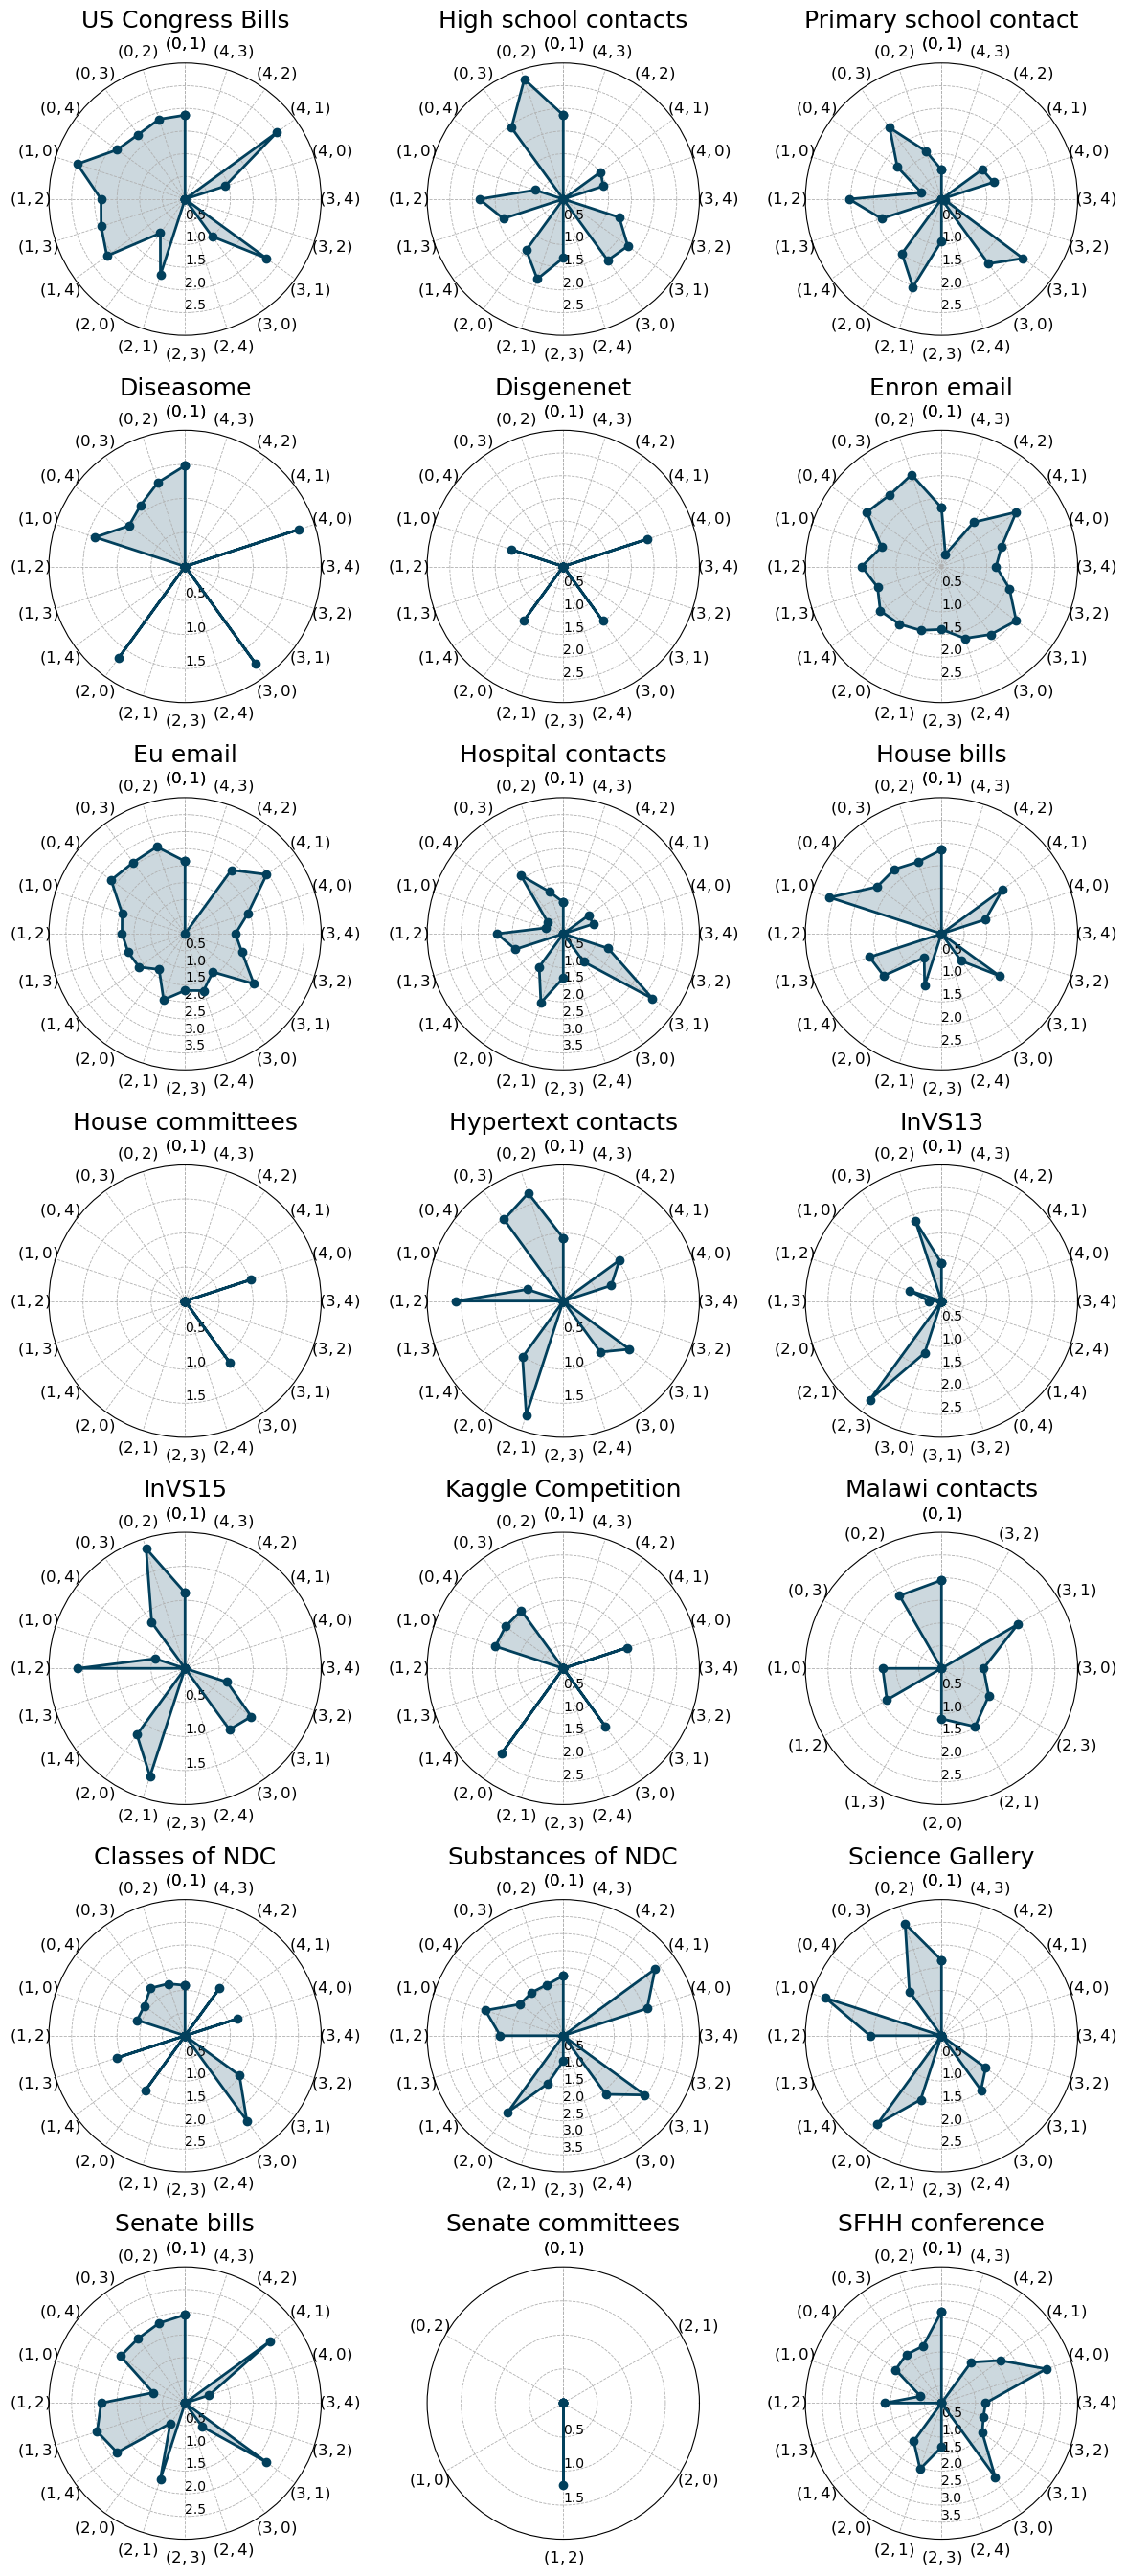

In [238]:
names_hg = ['congress-bills', 'contact-high-school', 'contact-primary-school', 'diseasome', 'disgenenet','email-enron', 'email-eu', 'hospital-lyon', 'house-bills', 'house-committees', 'hypertext-conference', 'invs13', 'invs15','kaggle-whats-cooking', 'malawi-village','ndc-classes', 'ndc-substances', 'science-gallery', 'senate-bills', 'senate-committees','sfhh-conference']
true_names_hg = ['US Congress Bills', 'High school contacts', 'Primary school contact', 'Diseasome', 'Disgenenet', 'Enron email', 'Eu email', 'Hospital contacts', 'House bills', 'House committees', 'Hypertext contacts', 'InVS13', 'InVS15', 'Kaggle Competition', 'Malawi contacts', 'Classes of NDC', 'Substances of NDC', 'Science Gallery', 'Senate bills', 'Senate committees', 'SFHH conference']

laplacians_types = ['01', '02', '03', '04', '10', '12', '13', '14', '20', '21', '23', '24', '30', '31', '32', '34', '40', '41', '42', '43']

idx = 0
plt.figure(figsize = (12,27))
for name in names_hg:
    sip = SIP[name]
    #sip_cl = SIP_cl[name]
    lap = list(sip.keys())

    ax = plt.subplot(7,3,idx+1, polar=True)
    angles = np.mod(np.pi/2 + np.linspace(0, 2*np.pi, len(lap), endpoint=False),2*np.pi)
    stats = list(sip.values())
    #stats_nm = list(sip_cl.values())
    #M =round( (max(max(stats), max(stats_nm))) + 0.6)
    M =round( max(stats) + 0.6)

    angles = np.concatenate((angles,[angles[0]]))

    stats = np.concatenate((stats,[stats[0]]))
    #stats_nm = np.concatenate((stats_nm, [stats_nm[0]]))


    #if len(stats) != len(stats_nm):
        #print(len(stats), len(stats_nm))


    #ax.plot(angles, stats_nm, 'o-', linewidth=2,color = 'grey')
    #ax.fill(angles, stats_nm, alpha=0.2,color = 'grey')

    ax.plot(angles, stats, 'o-', linewidth=2,color = colors_curves[0])
    ax.fill(angles, stats, alpha=0.2,color = colors_curves[0])

    ax.set_xticks(angles,[f"${{({l[0]},{l[1]})}}$" for l in lap+[lap[0]]],fontsize = 12)
    #ax.tick_params(axis='x', which='major', pad=13)
    ax.grid(linewidth=0.6,linestyle = '--')
    ax.set_rmax(M)
    ax.set_rticks([l for l in np.arange(0.5, M, 0.5)])
    ax.set_rlabel_position(-90)

    ax.set_title(true_names_hg[names_hg.index(name)], fontsize = 18)
    idx+=1
plt.tight_layout()

#plt.savefig('....pdf',bbox_inches = "tight")


## Cluster real network according to their signature (fig. 4b)

Load the entropic susceptibilities of the networks

In [77]:
names = ['ego-facebook', 'subelj_euroroad_euroroad', 'dimacs10-netscience', 'arenas-email', 'dimacs10-celegans_metabolic', 'asoiaf', 'maayan-vidal', 'opsahl-powergrid', 'moreno_propro_propro', 'petster-friendships-hamster-uniq', 'autobahn', 'mixed.species_brain_1', 'rhesus_brain_2', 'mouse_visual.cortex_2', 'c.elegans_neural.male_1', 'iui.net', 'cora_cite.rn', 'Flensburg_Data_Links.csv', 'out.moreno_crime_crime', 'hessen', 'road-minnesota.mtx', 'ca-CSphd.mtx', 'yeast.txt', 'Barcelona.txt', 'freshwater.txt', 'out.maayan-foodweb', 'p.pacificus_neural.synaptic_1.graphml', 'scsc.net', 'NZ_collaboration_network.graphml', 'geom.net', 'out.moreno_innovation_innovation', 'Erdos', 'ca-sandi_auths.txt', 'fb-pages-food.edges', 'bio-diseasome.txt', 'bio-DM-HT.edges', 'eco-florida.edges', 'email-enron', 'contact-high-school']
true_names = ['Facebook', 'E-Roads', 'Network Science Coauthorship', 'Email', 'C. Elegans Metabolic', 'Asoiaf', 'Human Protein', 'Power Grid', 'Yeast Protein', 'Hamsterer Friendships', 'German Highway System', 'Cat Brain', 'Rhesus Brain', 'Mouse Visual Cortex', 'C. Elegans Posterior Nervous System', 'IUI Journal Authors', 'CoRA Citations', 'Flensburg Fjord Food Web', 'St. Louis Crime', 'Hessen Traffic', 'Minnesota Roads', 'PhD Computer Science', 'Yeast Interactome', 'Barcelona Roads', 'Freshwater Stream Food Web', 'Little Rock Lake Food Web', 'P. Pacificus Neural', 'Slovenian Computer Scientists', 'New Zealand Scientific Collaboration', 'Computational Geometry', 'Physician Trust Network', 'Erdos Collaboration', 'Sandi', 'Facebook Food Pages', 'Diseasome', 'C. Elegans Genes', 'Florida Ecological', 'Enron', 'High School Contacts']
types = ['Social', 'Infrastructure', 'Collaboration', 'Social', 'Biological', 'Social', 'Biological', 'Infrastructure', 'Biological', 'Social', 'Infrastructure', 'Connectome', 'Connectome', 'Connectome', 'Connectome', 'Collaboration', 'Collaboration', 'Ecological', 'Social', 'Infrastructure', 'Infrastructure', 'Collaboration', 'Biological', 'Infrastructure', 'Ecological', 'Ecological', 'Connectome', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Collaboration', 'Social', 'Biological', 'Biological', 'Ecological', 'Social', 'Social']

laplacians_types = ["01","02","10","12","20","21"]
tau_space = np.logspace(-4,5,200)
measure = np.zeros((len(names),6))

ymin = -4

for nn,name in enumerate(names):
    with open(f'../C_curves/RealData/standard/{name}_sp_heats.pickle', 'rb') as handle:
        C_curves = pickle.load(handle)  
        if len(C_curves) > 6:
            ids = [0,1,3,4,6,7]
            C_curves = [C_curves[i] for i in ids]
    for i in range(len(laplacians_types)):
        measure[nn,i] = renormalize.measure_SI(tau_space,C_curves[i],epsilon=0.15,ymin = ymin,ymax = 2,ny = 100)

/Users/martamorandini/Desktop/projects/Simplicial_Renormalization/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:71: RuntimeWarning: divide by zero encountered in log
  sp_heat =  np.log(sp_heat)
/Users/martamorandini/Desktop/projects/Simplicial_Renormalization/higher_order_LRG/HOLR/Experiments_setups/../Functions/renormalize.py:71: RuntimeWarning: invalid value encountered in log
  sp_heat =  np.log(sp_heat)


In [224]:
#import pca on xgi
with open(f"../Experiments_results/xgi/SIP.pkl", "rb") as f:
    SIP = pickle.load(f)
with open(f"../Experiments_results/xgi/measure.pkl", "rb") as f:
    measure_hg = pickle.load(f)

In [211]:
names_hg = ['congress-bills', 'contact-high-school', 'contact-primary-school', 'diseasome', 'disgenenet','email-enron', 'email-eu', 'hospital-lyon', 'house-bills', 'house-committees', 'hypertext-conference', 'invs13', 'invs15','kaggle-whats-cooking', 'malawi-village','ndc-classes', 'ndc-substances', 'science-gallery', 'senate-bills', 'senate-committees','sfhh-conference']
true_names_hg = ['US Congress Bills', 'High school contacts', 'Primary school contact', 'Diseasome', 'Disgenenet', 'Enron email', 'Eu email', 'Hospital contacts', 'House bills', 'House committees', 'Hypertext contacts', 'InVS13', 'InVS15', 'Kaggle Competition', 'Malawi contacts', 'Classes of NDC', 'Substances of NDC', 'Science Gallery', 'Senate bills', 'Senate committees', 'SFHH conference']
types_hg = ['Collaboration', 'Social', 'Social', 'Biological', 'Biological', 'Social', 'Social', 'Social', 'Collaboration', 'Collaboration', 'Social','Social', 'Social', 'Other', 'Social', 'Biological', 'Biological', 'Social', 'Collaboration', 'Collaboration', 'Social']

In [212]:
# compute the measure matrix for both clique-complex and hypergraphs (cutting at max dim = 2)
laplacians_types = ["01","02","10","12","20","21"]

measure_both = np.zeros((len(true_names)+len(true_names_hg), len(laplacians_types)))
for nn, name in enumerate(names):
    measure_both[nn, :] = measure[nn, :]
for nn, name in enumerate(names_hg):
    for i, l in enumerate(laplacians_types):
        measure_both[nn + len(names), i] = SIP[name][l]


Perform PCA

In [221]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

pca = decomposition.PCA(n_components=6)
scaler = StandardScaler()
pca.fit(measure)
X = pca.transform(measure)

pca = decomposition.PCA(n_components=6)
scaler = StandardScaler()
pca.fit(measure_hg)
X_hg = pca.transform(measure_hg)

pca = decomposition.PCA(n_components=6)
scaler = StandardScaler()
pca.fit(measure_both)
X_both = pca.transform(measure_both)

Perform NMF

In [222]:
from sklearn.decomposition import NMF
model = NMF(n_components=2)
W = model.fit_transform(measure.T)
NMF = model.components_
NMF = NMF.T

W = model.fit_transform(measure_hg.T)
NMF_hg = model.components_
NMF_hg = NMF_hg.T

W = model.fit_transform(measure_both.T)
NMF_both = model.components_
NMF_both = NMF_both.T


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Plot the projection

In [86]:
import matplotlib.colors as mcolors

cols = list(mcolors.TABLEAU_COLORS)
cols = colors_curves
types_dict = np.unique(types)
types_dict = {ty:cols[i] for i,ty in enumerate(types_dict)}
types_dict = {"Biological":cols[0],"Connectome":cols[3],"Ecological":cols[4],"Social":cols[2],"Collaboration":cols[5],"Infrastructure":cols[1], 'Other':'gray'}

types_dict_hg = np.unique(types_hg)
types_dict_hg = {ty:cols[i] for i,ty in enumerate(types_dict_hg)}
types_dict_hg = {"Biological":cols[0],"Connectome":cols[3],"Ecological":cols[4],"Social":cols[2],"Collaboration":cols[5],"Infrastructure":cols[1], 'Other':'gray'}

Plot the networks on the first two PCA components

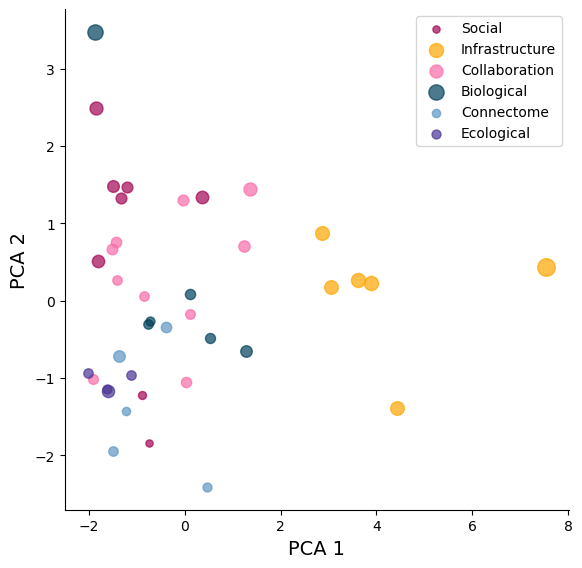

In [219]:
f = plt.figure(figsize=(6.5,6.5))

typecheck = {ty:0 for ty in types}
for n,name in enumerate(true_names):
    x = X[n, 0]
    y = X[n, 1]
    if typecheck[types[n]] == 0:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = types[n],alpha = 0.7,linewidths=1)
        typecheck[types[n]] = 1
    else:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = "",alpha = 0.7,linewidths=1)
    #plt.annotate(name,(x-0.1, y-0.15), fontsize=6, color = types_dict[types[n]])

plt.legend( loc = "upper right",frameon = True)

plt.xlabel("PCA 1",fontsize = 14)
plt.ylabel("PCA 2", fontsize = 14)
sns.despine()


Plot the hypergraphs on the first two PCA components

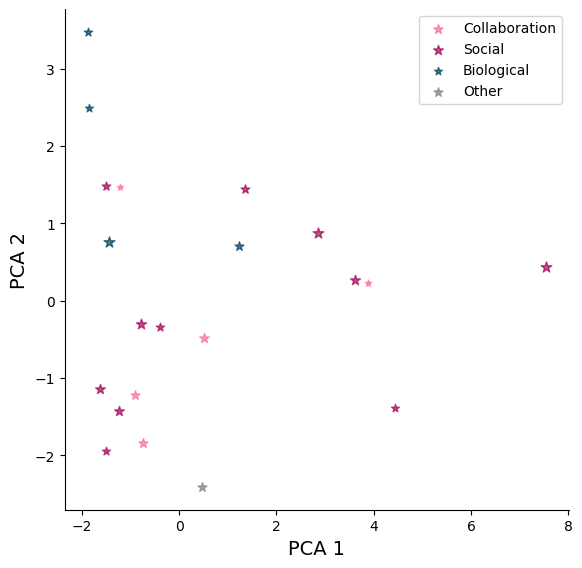

In [220]:
f = plt.figure(figsize=(6.5,6.5))

typecheck = {ty:0 for ty in types_hg}
for n,name in enumerate(true_names_hg):
    x = X[n, 0]
    y = X[n, 1]
    if typecheck[types_hg[n]] == 0:
        plt.scatter(x,y, marker = '*', color = types_dict_hg[types_hg[n]],s = 20*np.max(measure_hg[n,:]),label = types_hg[n],alpha = 0.7,linewidths=1)
        typecheck[types_hg[n]] = 1
    else:
        plt.scatter(x,y,marker = '*', color = types_dict_hg[types_hg[n]],s = 20*np.max(measure_hg[n,:]),label = "",alpha = 0.7,linewidths=1)
    #plt.annotate(name,(x, y+0.1), fontsize=6, color = types_dict_hg[types_hg[n]])

plt.legend( loc = "upper right",frameon = True)

plt.xlabel("PCA 1",fontsize = 14)
plt.ylabel("PCA 2", fontsize = 14)
sns.despine()

Plot the networks and the hypergraphs on the first two PCA components

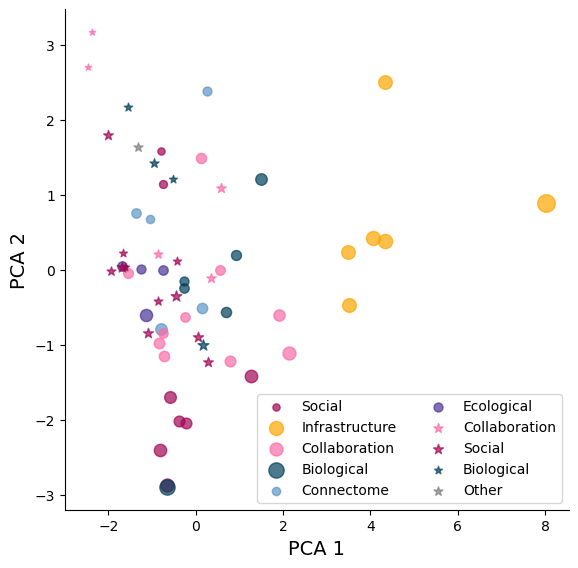

In [223]:
f = plt.figure(figsize=(6.5,6.5))

typecheck = {ty:0 for ty in types}
for n,name in enumerate(true_names):
    x = X_both[n, 0]
    y = X_both[n, 1]
    if typecheck[types[n]] == 0:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = types[n],alpha = 0.7,linewidths=1)
        typecheck[types[n]] = 1
    else:
        plt.scatter(x,y,color = types_dict[types[n]],s = 20*np.max(measure[n,:]),label = "",alpha = 0.7,linewidths=1)
    #plt.annotate(name,(x-0.1, y-0.15), fontsize=6, color = types_dict[types[n]])

typecheck = {ty:0 for ty in types_hg}
for n,name in enumerate(true_names_hg):
    x = X_both[n + len(true_names), 0]
    y = X_both[n + len(true_names), 1]
    if typecheck[types_hg[n]] == 0:
        plt.scatter(x,y, marker = '*', color = types_dict_hg[types_hg[n]],s = 20*np.max(measure_hg[n,:]),label = types_hg[n],alpha = 0.7,linewidths=1)
        typecheck[types_hg[n]] = 1
    else:
        plt.scatter(x,y,marker = '*', color = types_dict_hg[types_hg[n]],s = 20*np.max(measure_hg[n,:]),label = "",alpha = 0.7,linewidths=1)
    #plt.annotate(name,(x-1.5, y-0.1), fontsize=6, color = types_dict_hg[types_hg[n]])


plt.legend( loc = "lower right",frameon = True, ncol = 2)

plt.xlabel("PCA 1",fontsize = 14)
plt.ylabel("PCA 2", fontsize = 14)
sns.despine()

## Recomputing entropic susceptibilities and null models

The datasets references can be found in the paper's supplementary information Table I

In [97]:
# Import the network and compute its clique complex
name = "asoiaf"
f = open(f"../Datasets/Examples/out.{name}","r")
maxd = 2
sc = scomplex.import_network_data(f, maxd)

If ``NULL_MODEL = True`` then compute the null model by randomizing the adjacency graph with a configuration model

In [98]:
import networkx as nx
NULL_MODEL = True
nrep = 10
if NULL_MODEL:
    G = nx.from_edgelist(sc["edges"])

In [99]:
sparse = False
num_eigs = 500 # If sparse: the number of eigenvalues of L  to compute 

# Define strings which specify the cross-order Laplacians to consider
laplacians_types = ["01","02","10","12","20","21"]

C_curves = []
taumin = -3 # Heat curve starts from 10**taumin
taumax = 5 # Heat curve ends at 10**taumax
ntau = 200 # Number of taus to consider in the interval

if NULL_MODEL:
    for idl,l in enumerate(laplacians_types): 
        print(l)
        C_curves.append([])
        A = scomplex.adjacency_of_order(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
        for n in range(nrep):
            # # Configuration model
            Gcm = nx.Graph(A)
            Gcm = nx.configuration_model([val for (__, val) in Gcm.degree()])
            L = nx.laplacian_matrix(Gcm).todense()
            
            if sparse:
                D,__ = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
                D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
            else:
                D,__ = np.linalg.eigh(L)
                D = np.abs(D)
            entropic_susceptibility,tau_space,__  = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
            C_curves[idl].append(entropic_susceptibility)


else:
    for idl,l in enumerate(laplacians_types):    
        print(l) 
        ## Configuration model
        L = scomplex.XO_laplacian(sc, k=int(l[0]), l=int(l[1]),sparse = sparse)
        
        if sparse:
            D,__ = scipy.sparse.linalg.eigsh(L.asfptype(),k = num_eigs, which = "SM")
            D = np.append(D,1000000*np.ones(L.shape[0]-num_eigs),axis=0)
        else:
            D,__ = np.linalg.eigh(L)
            D = np.abs(D)
        entropic_susceptibility,tau_space,__  = renormalize.compute_entropic_C(D,taumin,taumax,ntau)
        C_curves.append(entropic_susceptibility)


01
02
10
12
20
21


Save data

In [100]:
savepath = f'../C_curves/RealData/NULL_MODEL/{name}_sp_heats.pickle'
with open(savepath, 'wb') as handle:
    pickle.dump(C_curves, handle, protocol=pickle.HIGHEST_PROTOCOL)